In [1]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
 

In [2]:
twt_alevie = pd.read_csv('./datasets/twt_alevie.csv')
twt_alevie

,dates,ID,content,rt,like
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K
...,...,...,...,...,...
227,2024-02-23,Aaron Levie@levie,We’re beta testing an AI feature internally at...,38,229
228,2024-02-24,Aaron Levie@levie,How could you passionately hate people this much.,71,607
229,2024-02-24,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251
230,2024-02-25,Aaron Levie@levie,Startups tend to win in spaces where the incum...,164,897


In [3]:
twt_list = twt_alevie['content'].values 

In [4]:
twt_list = twt_list.tolist()
twt_list

['This needs to be turned into a buddy comedy ASAP.',
 'The cool thing about naming a company Box is all the interesting news articles you get in your feed.',
 'Amazing quote:',
 'Some say innovation is dead, but how can that be if Twitter just rolled out the ability to search through DMs.',
 'The challenge with taxing unrealized gains is you can force selling or borrowing against assets at inopportune times, which can easily lead to systemic risk, volatility, or lack of long-term investing in the markets over time. Only bad scenarios. There must be another way.',
 'Remember: customers rarely care about how novel your technology is, only what problems it solves for them. Never lose sight of that as a startup.',
 'It is so frustrating that a few hundred people in DC are squandering our economic future.',
 'Honestly congrats to the web3 crowd for utterly confusing politicians ',
 'I have to admit, when we started Box we didn’t imagine one of the use cases would be Cardi B using it to com

In [5]:
twt_list = list(map(str,twt_list)) # 리스트 원소들 문자열로 변환
twt_list

['This needs to be turned into a buddy comedy ASAP.',
 'The cool thing about naming a company Box is all the interesting news articles you get in your feed.',
 'Amazing quote:',
 'Some say innovation is dead, but how can that be if Twitter just rolled out the ability to search through DMs.',
 'The challenge with taxing unrealized gains is you can force selling or borrowing against assets at inopportune times, which can easily lead to systemic risk, volatility, or lack of long-term investing in the markets over time. Only bad scenarios. There must be another way.',
 'Remember: customers rarely care about how novel your technology is, only what problems it solves for them. Never lose sight of that as a startup.',
 'It is so frustrating that a few hundred people in DC are squandering our economic future.',
 'Honestly congrats to the web3 crowd for utterly confusing politicians ',
 'I have to admit, when we started Box we didn’t imagine one of the use cases would be Cardi B using it to com

In [6]:
tk_list = []
for sentence in twt_list:
    tk_list.append(word_tokenize(sentence))
 
tk_list # 트윗 별 토큰화된 단어

[['This',
  'needs',
  'to',
  'be',
  'turned',
  'into',
  'a',
  'buddy',
  'comedy',
  'ASAP',
  '.'],
 ['The',
  'cool',
  'thing',
  'about',
  'naming',
  'a',
  'company',
  'Box',
  'is',
  'all',
  'the',
  'interesting',
  'news',
  'articles',
  'you',
  'get',
  'in',
  'your',
  'feed',
  '.'],
 ['Amazing', 'quote', ':'],
 ['Some',
  'say',
  'innovation',
  'is',
  'dead',
  ',',
  'but',
  'how',
  'can',
  'that',
  'be',
  'if',
  'Twitter',
  'just',
  'rolled',
  'out',
  'the',
  'ability',
  'to',
  'search',
  'through',
  'DMs',
  '.'],
 ['The',
  'challenge',
  'with',
  'taxing',
  'unrealized',
  'gains',
  'is',
  'you',
  'can',
  'force',
  'selling',
  'or',
  'borrowing',
  'against',
  'assets',
  'at',
  'inopportune',
  'times',
  ',',
  'which',
  'can',
  'easily',
  'lead',
  'to',
  'systemic',
  'risk',
  ',',
  'volatility',
  ',',
  'or',
  'lack',
  'of',
  'long-term',
  'investing',
  'in',
  'the',
  'markets',
  'over',
  'time',
  '.',
  

In [7]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words())
result_list = []

for tk_list_list in tk_list: # [[]] to []
    result = [] 
    for word in tk_list_list: # list to word arg
        
        if (word not in stop_words) and (word not in string.punctuation) and (word not in ('’')) and (word not in ('“')) and (word not in ('”')):   
            word = word.lower()
            result.append(word)
    result_list.append(result)
print(result_list) # 불용어(스탑워드) 제거

[['this', 'turned', 'buddy', 'comedy', 'asap'], ['the', 'cool', 'naming', 'company', 'box', 'interesting', 'news', 'articles', 'feed'], ['amazing', 'quote'], ['some', 'innovation', 'dead', 'twitter', 'rolled', 'ability', 'search', 'dms'], ['the', 'challenge', 'taxing', 'unrealized', 'gains', 'force', 'selling', 'borrowing', 'assets', 'inopportune', 'times', 'easily', 'lead', 'systemic', 'risk', 'volatility', 'lack', 'long-term', 'investing', 'markets', 'time', 'only', 'scenarios', 'there'], ['remember', 'customers', 'rarely', 'technology', 'problems', 'solves', 'never', 'lose', 'sight', 'startup'], ['it', 'frustrating', 'hundred', 'dc', 'squandering', 'economic', 'future'], ['honestly', 'congrats', 'web3', 'crowd', 'utterly', 'confusing', 'politicians'], ['i', 'admit', 'started', 'box', 'imagine', 'cases', 'cardi', 'b', 'receipts'], ['just', 'remember', 'scale', 'consumers', 'generally', 'choose', 'simpler', 'software', 'successfully', 'perform', 'task', 'hand', 'if', 'technical', 'com

In [8]:
from nltk.corpus import wordnet
from collections import defaultdict

def assign_category(word):
    try:
        categories = ['business', 'company', 'emotion', 'social', 'technology', 'general', 'product', 'politics', 'environment', 'innovation']
        max_similarity = -1  # 초기값 설정
        assigned_category = None
        
        for category in categories:
            synsets = wordnet.synsets(category)
            for synset in synsets:
                similarity = synset.path_similarity(wordnet.synsets(word)[0]) if wordnet.synsets(word) else None
                if similarity and similarity > max_similarity:
                    max_similarity = similarity
                    assigned_category = category
        return assigned_category
    except IndexError:
        return None

def assign_categories_to_sentence(sentence_tokens):
    category_counts = defaultdict(int)
    
    for word in sentence_tokens:
        category = assign_category(word)
        if category:
            category_counts[category] += 1
    
    if category_counts:
        # 가장 많이 할당된 카테고리 반환
        assigned_category = max(category_counts, key=category_counts.get)
        return assigned_category, category_counts[assigned_category]
    else:
        return None

# 테스트
sentence_tokens = ['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']
assigned_category = assign_categories_to_sentence(sentence_tokens)
print(f"입력된 문장의 토큰 '{sentence_tokens}'에 대한 연관성이 가장 높은 카테고리: {assigned_category}")


입력된 문장의 토큰 '['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']'에 대한 연관성이 가장 높은 카테고리: ('product', 4)


In [9]:
# 토큰화된 단어와 주제 연결
topic_conv_list=[]
for sentence in result_list:
    assigned_category = assign_categories_to_sentence(sentence)
    if assigned_category != None:
        topic_conv_list.append({'word' : sentence, 'topic' : assigned_category[0]})
topic_conv_list

[{'word': ['this', 'turned', 'buddy', 'comedy', 'asap'], 'topic': 'social'},
 {'word': ['the',
   'cool',
   'naming',
   'company',
   'box',
   'interesting',
   'news',
   'articles',
   'feed'],
  'topic': 'business'},
 {'word': ['amazing', 'quote'], 'topic': 'social'},
 {'word': ['some',
   'innovation',
   'dead',
   'twitter',
   'rolled',
   'ability',
   'search',
   'dms'],
  'topic': 'business'},
 {'word': ['the',
   'challenge',
   'taxing',
   'unrealized',
   'gains',
   'force',
   'selling',
   'borrowing',
   'assets',
   'inopportune',
   'times',
   'easily',
   'lead',
   'systemic',
   'risk',
   'volatility',
   'lack',
   'long-term',
   'investing',
   'markets',
   'time',
   'only',
   'scenarios',
   'there'],
  'topic': 'business'},
 {'word': ['remember',
   'customers',
   'rarely',
   'technology',
   'problems',
   'solves',
   'never',
   'lose',
   'sight',
   'startup'],
  'topic': 'social'},
 {'word': ['it',
   'frustrating',
   'hundred',
   'dc',
  

In [10]:
# 트윗의 카테고리 카운트
topic_conv_list = pd.DataFrame(topic_conv_list)
df = topic_conv_list['topic'].value_counts()
df

topic
business       95
social         88
product        17
company        15
emotion         6
politics        4
general         3
environment     2
technology      1
Name: count, dtype: int64

In [11]:
df.values.tolist()

[95, 88, 17, 15, 6, 4, 3, 2, 1]

In [12]:
df.index.tolist()

['business',
 'social',
 'product',
 'company',
 'emotion',
 'politics',
 'general',
 'environment',
 'technology']

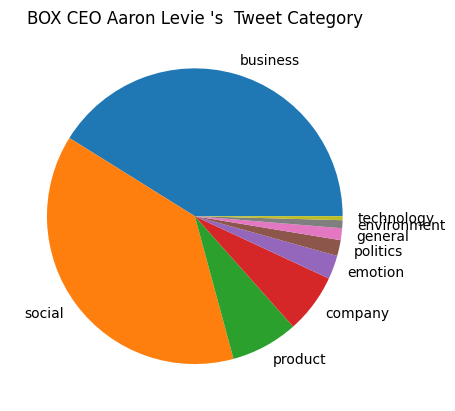

In [13]:
import matplotlib.pyplot as plt

plt.pie(df.values.tolist(),labels=df.index.tolist() )
plt.title("BOX CEO Aaron Levie 's  Tweet Category")
plt.show()

감성분석

In [14]:
from nltk import sent_tokenize, word_tokenize
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
import os
plt.style.use('fivethirtyeight')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mit015\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mit015\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mit015\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mit015\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\mit015\AppData\Roaming\nltk_data...
[nltk_data] 

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()

In [16]:
from textblob import TextBlob


twt_df_copy = twt_alevie.copy()
twt_df_copy['content'] = twt_df_copy['content'].astype(str)

# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
twt_df_copy['Subjectivity'] = twt_df_copy['content'].apply(getSubjectivity)
twt_df_copy['Polarity'] = twt_df_copy['content'].apply(getPolarity)

# Compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 0 # NEGATIVE
    elif score == 0:
        return 1 # NEUTRAL
    else:
        return 2 # POSITIVE
    
twt_df_copy['Analysis'] = twt_df_copy['Polarity'].apply(getAnalysis)

twt_df_copy.head()

,dates,ID,content,rt,like,Subjectivity,Polarity,Analysis
0,2022-03-19,Aaron Levie@levie,This needs to be turned into a buddy comedy ASAP.,18,416,0.000000,0.000000,1
1,2022-03-21,Aaron Levie@levie,The cool thing about naming a company Box is a...,2,131,0.575000,0.425000,2
2,2022-03-24,Aaron Levie@levie,Amazing quote:,9,196,0.900000,0.600000,2
3,2022-03-25,Aaron Levie@levie,"Some say innovation is dead, but how can that ...",59,580,0.400000,-0.200000,0
4,2022-03-29,Aaron Levie@levie,The challenge with taxing unrealized gains is ...,96,1.1K,0.833333,-0.088889,0


In [17]:
twt_df_copy['Analysis'].value_counts()

Analysis
2    147
1     48
0     37
Name: count, dtype: int64

In [18]:
twt_df_copy['Analysis'].value_counts().values.tolist()

[147, 48, 37]

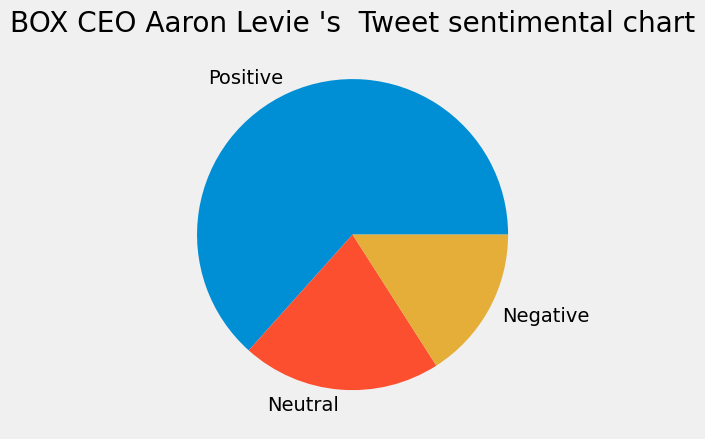

In [19]:
plt.pie(twt_df_copy['Analysis'].value_counts().values.tolist(), labels=['Positive', 'Neutral', 'Negative'])
plt.title("BOX CEO Aaron Levie 's  Tweet sentimental chart")
plt.show()

딥러닝 BERT

In [201]:
# 입력요소
# 트윗의 주제, subjectivity(주관성점수; 의견이 주관적인 생각인지 객관적인 내용인지), 감성지수, 리트윗수, 좋아요수

# 출력할 예측요소
# 양수
# 음수
# 전날 음수값 대비 절대값 작은경우 ( 감소폭이 줄어들었을때)
# 전날 음수값 대비 절대값 큰 경우
# 전날 양수값 대비 작은경우
# 전날 양수값 대비 큰 경우

import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA


stock_df = pd.read_csv('datasets/final_df.csv')
stock_df.head()

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2022-03-10,@BillGates,283.019989,286.600006,280.579987,285.589996,280.513275,30628000.0,-2.858246,NaN,NaN,NaN
1,2022-03-10,@Carl_C_Icahn,54.110001,54.400002,53.500000,54.000000,36.296310,551600.0,0.047050,NaN,NaN,NaN
2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64
3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21
4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23


<h2>1. 데이터 구조 확인

In [202]:
stock_df.shape

(6503, 12)

In [203]:
stock_df.columns

Index(['Date', 'name', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume',
       'adjClose_diff', 'content', 'rt', 'like'],
      dtype='object')

In [204]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6503 entries, 0 to 6502
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6503 non-null   object 
 1   name           6503 non-null   object 
 2   Open           5774 non-null   float64
 3   High           5774 non-null   float64
 4   Low            5774 non-null   float64
 5   Close          5774 non-null   float64
 6   AdjClose       5774 non-null   float64
 7   Volume         5774 non-null   float64
 8   adjClose_diff  5774 non-null   float64
 9   content        2111 non-null   object 
 10  rt             2106 non-null   object 
 11  like           2128 non-null   object 
dtypes: float64(7), object(5)
memory usage: 609.8+ KB


In [205]:
stock_df['name'].value_counts()

name
@elonmusk          1089
@JohnLegere        1085
@levie              621
@BillGates          566
@bchesky            511
@LisaSu             509
@Carl_C_Icahn       507
@reedhastings       505
@richardbranson     503
@tim_cock           502
@tim_cook           105
Name: count, dtype: int64

In [206]:
from glob import glob

twt_tim_path = glob('datasets/twt_tim*.csv')

twt_tim_path

twt_tim_data = []

for file_path in twt_tim_path:
    data = pd.read_csv(file_path, low_memory=False)
    twt_tim_data.append(data)

twt_tim_df = pd.concat(twt_tim_data)

twt_tim_df.head()

,dates,ID,content,rt,like
0,2022-03-11,Tim Cook@tim_cook,"As a proud member of the LGBTQ+ community, I a...",2.9K,26K
1,2022-03-12,Tim Cook@tim_cook,.@Malala’s episode of Time to Walk on Fitness+...,271,2.4K
2,2022-03-12,Tim Cook@tim_cook,As the east coast of Australia contends with t...,418,6K
3,2022-03-12,Tim Cook@tim_cook,Celebrating incredible writer/director @sianhe...,249,3.7K
4,2022-03-16,Tim Cook@tim_cook,Our Impact Accelerator creates opportunities f...,138,1.4K


In [207]:
twt_tim_df['ID'] = '@tim_cock'
twt_tim_df.columns = ['Date', 'name', 'content', 'rt', 'like']
twt_tim_df.head(), twt_tim_df.shape

(         Date       name                                            content  \
 0  2022-03-11  @tim_cock  As a proud member of the LGBTQ+ community, I a...   
 1  2022-03-12  @tim_cock  .@Malala’s episode of Time to Walk on Fitness+...   
 2  2022-03-12  @tim_cock  As the east coast of Australia contends with t...   
 3  2022-03-12  @tim_cock  Celebrating incredible writer/director @sianhe...   
 4  2022-03-16  @tim_cock  Our Impact Accelerator creates opportunities f...   
 
      rt  like  
 0  2.9K   26K  
 1   271  2.4K  
 2   418    6K  
 3   249  3.7K  
 4   138  1.4K  ,
 (105, 5))

In [208]:
tim_df = stock_df[stock_df['name']=='@tim_cock']

In [209]:
df_1 = tim_df.merge(twt_tim_df, how='outer', on='Date')

df_1

,Date,name_x,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content_x,rt_x,like_x,name_y,content_y,rt_y,like_y
0,2022-03-10,@tim_cock,160.199997,160.389999,155.979996,158.520004,156.728958,105342000.0,-4.379944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-11,@tim_cock,158.929993,159.279999,154.500000,154.729996,152.981750,96970100.0,-3.747208,NaN,NaN,NaN,@tim_cock,"As a proud member of the LGBTQ+ community, I a...",2.9K,26K
2,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@tim_cock,.@Malala’s episode of Time to Walk on Fitness+...,271,2.4K
3,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@tim_cock,As the east coast of Australia contends with t...,418,6K
4,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@tim_cock,Celebrating incredible writer/director @sianhe...,249,3.7K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2024-03-04,@tim_cock,176.149994,176.899994,173.789993,175.100006,175.100006,81510100.0,-4.559998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,2024-03-05,@tim_cock,170.759995,172.039993,169.619995,170.119995,170.119995,95132400.0,-4.980011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,2024-03-06,@tim_cock,171.059998,171.240005,168.679993,169.119995,169.119995,68587700.0,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,2024-03-07,@tim_cock,169.149994,170.729996,168.490005,169.000000,169.000000,71765100.0,-0.119995,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df_1.drop(['content_x', 'rt_x',	'like_x', 'name_y'], axis=1, inplace=True)
df_1.columns = ['Date', 'name', 'Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume', 'adjClose_diff', 'content', 'rt', 'like']

df_1.head()

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2022-03-10,@tim_cock,160.199997,160.389999,155.979996,158.520004,156.728958,105342000.0,-4.379944,NaN,NaN,NaN
1,2022-03-11,@tim_cock,158.929993,159.279999,154.500000,154.729996,152.981750,96970100.0,-3.747208,"As a proud member of the LGBTQ+ community, I a...",2.9K,26K
2,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.@Malala’s episode of Time to Walk on Fitness+...,271,2.4K
3,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,As the east coast of Australia contends with t...,418,6K
4,2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Celebrating incredible writer/director @sianhe...,249,3.7K


In [211]:
df_1_copy = df_1.copy()
df_1_copy['content'].fillna('no content', inplace=True)
df_1_copy['rt'].fillna(0, inplace=True)
df_1_copy['like'].fillna(0, inplace=True)
df_1_copy.fillna(method='ffill', inplace=True)

df_1_copy.head()

C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\3422878516.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1_copy['content'].fillna('no content', inplace=True)
C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\3422878516.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2022-03-10,@tim_cock,160.199997,160.389999,155.979996,158.520004,156.728958,105342000.0,-4.379944,no content,0,0
1,2022-03-11,@tim_cock,158.929993,159.279999,154.500000,154.729996,152.981750,96970100.0,-3.747208,"As a proud member of the LGBTQ+ community, I a...",2.9K,26K
2,2022-03-12,@tim_cock,158.929993,159.279999,154.500000,154.729996,152.981750,96970100.0,-3.747208,.@Malala’s episode of Time to Walk on Fitness+...,271,2.4K
3,2022-03-12,@tim_cock,158.929993,159.279999,154.500000,154.729996,152.981750,96970100.0,-3.747208,As the east coast of Australia contends with t...,418,6K
4,2022-03-12,@tim_cock,158.929993,159.279999,154.500000,154.729996,152.981750,96970100.0,-3.747208,Celebrating incredible writer/director @sianhe...,249,3.7K


In [212]:
df_1_copy.shape

(550, 12)

In [213]:
index_list = stock_df[stock_df['name']=='@tim_cook'].index.tolist()
stock_df.drop(index_list, axis=0, inplace=True)
index_list = stock_df[stock_df['name']=='@tim_cock'].index.tolist()
stock_df.drop(index_list, axis=0, inplace=True)

In [214]:
stock_df['name'].value_counts()

name
@elonmusk          1089
@JohnLegere        1085
@levie              621
@BillGates          566
@bchesky            511
@LisaSu             509
@Carl_C_Icahn       507
@reedhastings       505
@richardbranson     503
Name: count, dtype: int64

In [215]:
lst = []
lst.append(stock_df)
lst.append(df_1_copy)

stock_dff = pd.concat(lst)

stock_dff.head()

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2022-03-10,@BillGates,283.019989,286.600006,280.579987,285.589996,280.513275,30628000.0,-2.858246,NaN,NaN,NaN
1,2022-03-10,@Carl_C_Icahn,54.110001,54.400002,53.500000,54.000000,36.296310,551600.0,0.047050,NaN,NaN,NaN
2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64
3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21
4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23


In [229]:
stock_dff.reset_index(drop=True, inplace=True)
stock_dff.head()

,Date,name,Open,High,Low,Close,AdjClose,Volume,adjClose_diff,content,rt,like
0,2022-03-10,@BillGates,283.019989,286.600006,280.579987,285.589996,280.513275,30628000.0,-2.858246,no content,0,0
1,2022-03-10,@Carl_C_Icahn,54.110001,54.400002,53.500000,54.000000,36.296310,551600.0,0.047050,no content,0,0
2,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Absolutely not - always ice cold water!,2.0,64
3,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,Spell check via text is a game changer!,1.0,21
4,2022-03-10,@JohnLegere,120.660004,123.919998,120.440002,123.540001,122.514946,4200600.0,1.566887,I wish I saw this before my flight today!\r\nh...,2.0,23


In [262]:
stock_dff.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,6446,677,2022-12-16,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6446,10,@elonmusk,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,6446.0,NaN,NaN,NaN,153.110452,109.196092,1.42,54.302499,142.724998,213.715832,621.559998
High,6446.0,NaN,NaN,NaN,155.436665,110.703794,1.48,54.565001,144.145004,220.970001,624.419983
Low,6446.0,NaN,NaN,NaN,150.700206,107.613129,1.38,53.9525,140.899994,209.9375,615.080017
Close,6446.0,NaN,NaN,NaN,153.096888,109.144043,1.38,54.2825,142.674995,214.597496,619.340027
AdjClose,6446.0,NaN,NaN,NaN,151.947056,109.566828,1.38,42.27615,141.675468,214.597496,619.340027
Volume,6446.0,NaN,NaN,NaN,37067674.744027,47769254.588044,156500.0,3916300.0,8836400.0,64172000.0,306590600.0
adjClose_diff,6446.0,NaN,NaN,NaN,-0.082464,5.070371,-122.419983,-1.304958,0.01,1.328674,55.579987
content,6446,2090,no content,4335,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
print(stock_dff.isna().sum())
print(stock_dff.isnull().sum())

Date                0
name                0
Open              624
High              624
Low               624
Close             624
AdjClose          624
Volume            624
adjClose_diff     624
content          3889
rt               3895
like             3873
dtype: int64
Date                0
name                0
Open              624
High              624
Low               624
Close             624
AdjClose          624
Volume            624
adjClose_diff     624
content          3889
rt               3895
like             3873
dtype: int64


In [230]:
# 결측치 처리를 먼저 해봅시다

stock_dff['content'].fillna('no content', inplace=True)
stock_dff['rt'].fillna(0, inplace=True)
stock_dff['like'].fillna(0, inplace=True)

stock_dff.isna().sum()
stock_dff.isnull().sum()

C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\12087788.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_dff['content'].fillna('no content', inplace=True)
C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\12087788.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Date               0
name               0
Open             624
High             624
Low              624
Close            624
AdjClose         624
Volume           624
adjClose_diff    624
content            0
rt                 0
like               0
dtype: int64

In [219]:
ceo_names = stock_dff['name'].unique().tolist()
ceo_names

['@BillGates',
 '@Carl_C_Icahn',
 '@JohnLegere',
 '@LisaSu',
 '@bchesky',
 '@elonmusk',
 '@levie',
 '@reedhastings',
 '@richardbranson',
 '@tim_cock']

In [231]:
stock_dff[stock_dff['name']=='@levie'][["Open", "Close", "High", "Low", "AdjClose", "Volume", "adjClose_diff"]]

,Open,Close,High,Low,AdjClose,Volume,adjClose_diff
8,26.520000,26.000000,27.305000,25.620001,26.000000,2026600.0,-0.850000
19,26.139999,25.260000,26.150000,25.219999,25.260000,1600200.0,-0.740000
34,25.280001,25.219999,25.650000,25.035000,25.219999,1450700.0,-0.040001
44,25.360001,25.610001,25.680000,25.030001,25.610001,1431100.0,0.390002
53,25.700001,26.120001,26.209999,25.080000,26.120001,1933400.0,0.510000
...,...,...,...,...,...,...,...
5843,28.000000,27.879999,28.559999,27.600000,27.879999,7529900.0,1.339998
5855,27.540001,27.250000,27.740000,26.969999,27.250000,6224900.0,-0.629999
5866,28.950001,29.600000,30.020000,27.690001,29.600000,8807000.0,2.350000
5884,29.650000,29.740000,29.750000,29.080000,29.740000,4458500.0,0.140000


In [233]:
for ceo in ceo_names:
    df_fill = stock_dff[stock_dff['name']==ceo]
    df_fill.fillna(method='ffill', inplace=True)
    stock_dff.iloc[df_fill.index, :] = df_fill
    
stock_dff.isna().sum()

C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\3227255318.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill.fillna(method='ffill', inplace=True)
C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\3227255318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill.fillna(method='ffill', inplace=True)
C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\3227255318.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill.fillna(method='ffill', inplace=True)
C:\Users\mit015\AppData\Local\Temp\ipykernel_15660\3227255318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Date             0
name             0
Open             0
High             0
Low              0
Close            0
AdjClose         0
Volume           0
adjClose_diff    0
content          0
rt               0
like             0
dtype: int64

In [263]:
stock_dff.to_csv('datasets/stock_final.csv')

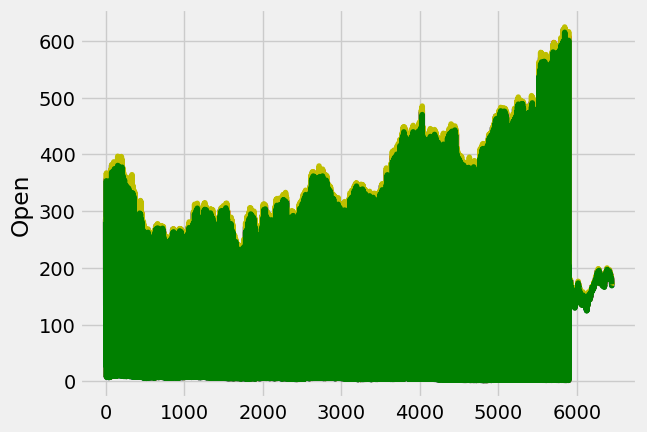

In [235]:
# 시각화를 진행합니다

fig, ax = plt.subplots()
colors = ['r', 'b', 'y', 'g']
columns = ['Open', 'Close', 'High', 'Low']
for i, col in enumerate(columns):
    sns.lineplot(stock_dff[col], color=colors[i])
    plt.grid()

<Axes: xlabel='Open', ylabel='count'>

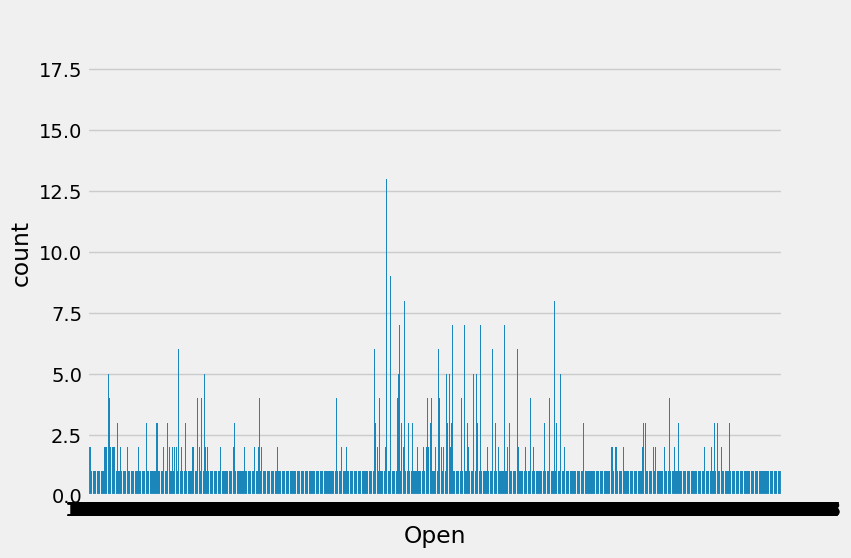

In [236]:
plt.figure(figsize=(8, 6))
sns.countplot(x=stock_dff.Open)

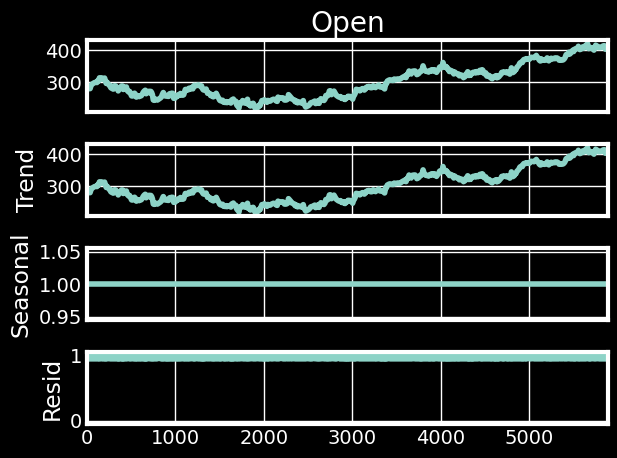

In [242]:
# seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose
bill_df = stock_dff[stock_dff['name']=='@BillGates'].copy()

decompose_result = seasonal_decompose(bill_df['Open'], model='multiplicative', period=1)
decompose_result.plot();

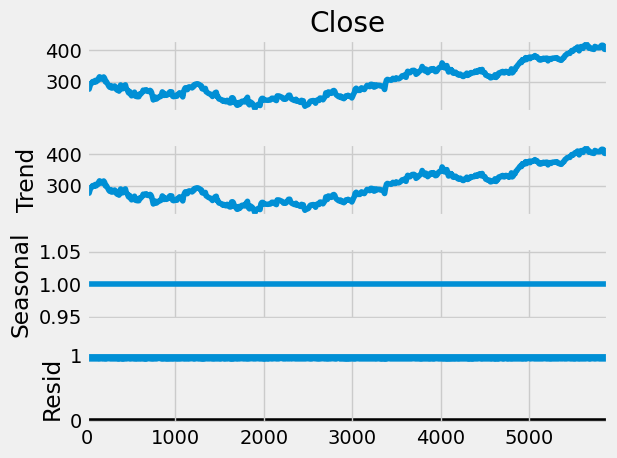

In [238]:
decompose_result = seasonal_decompose(bill_df.Close, model='multiplicative', period=1)
decompose_result.plot();

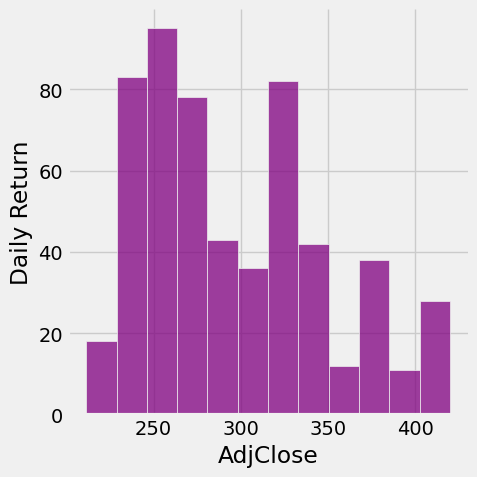

In [239]:
# distribution plot

sns.displot(bill_df['AdjClose'], color='purple');
plt.ylabel('Daily Return');

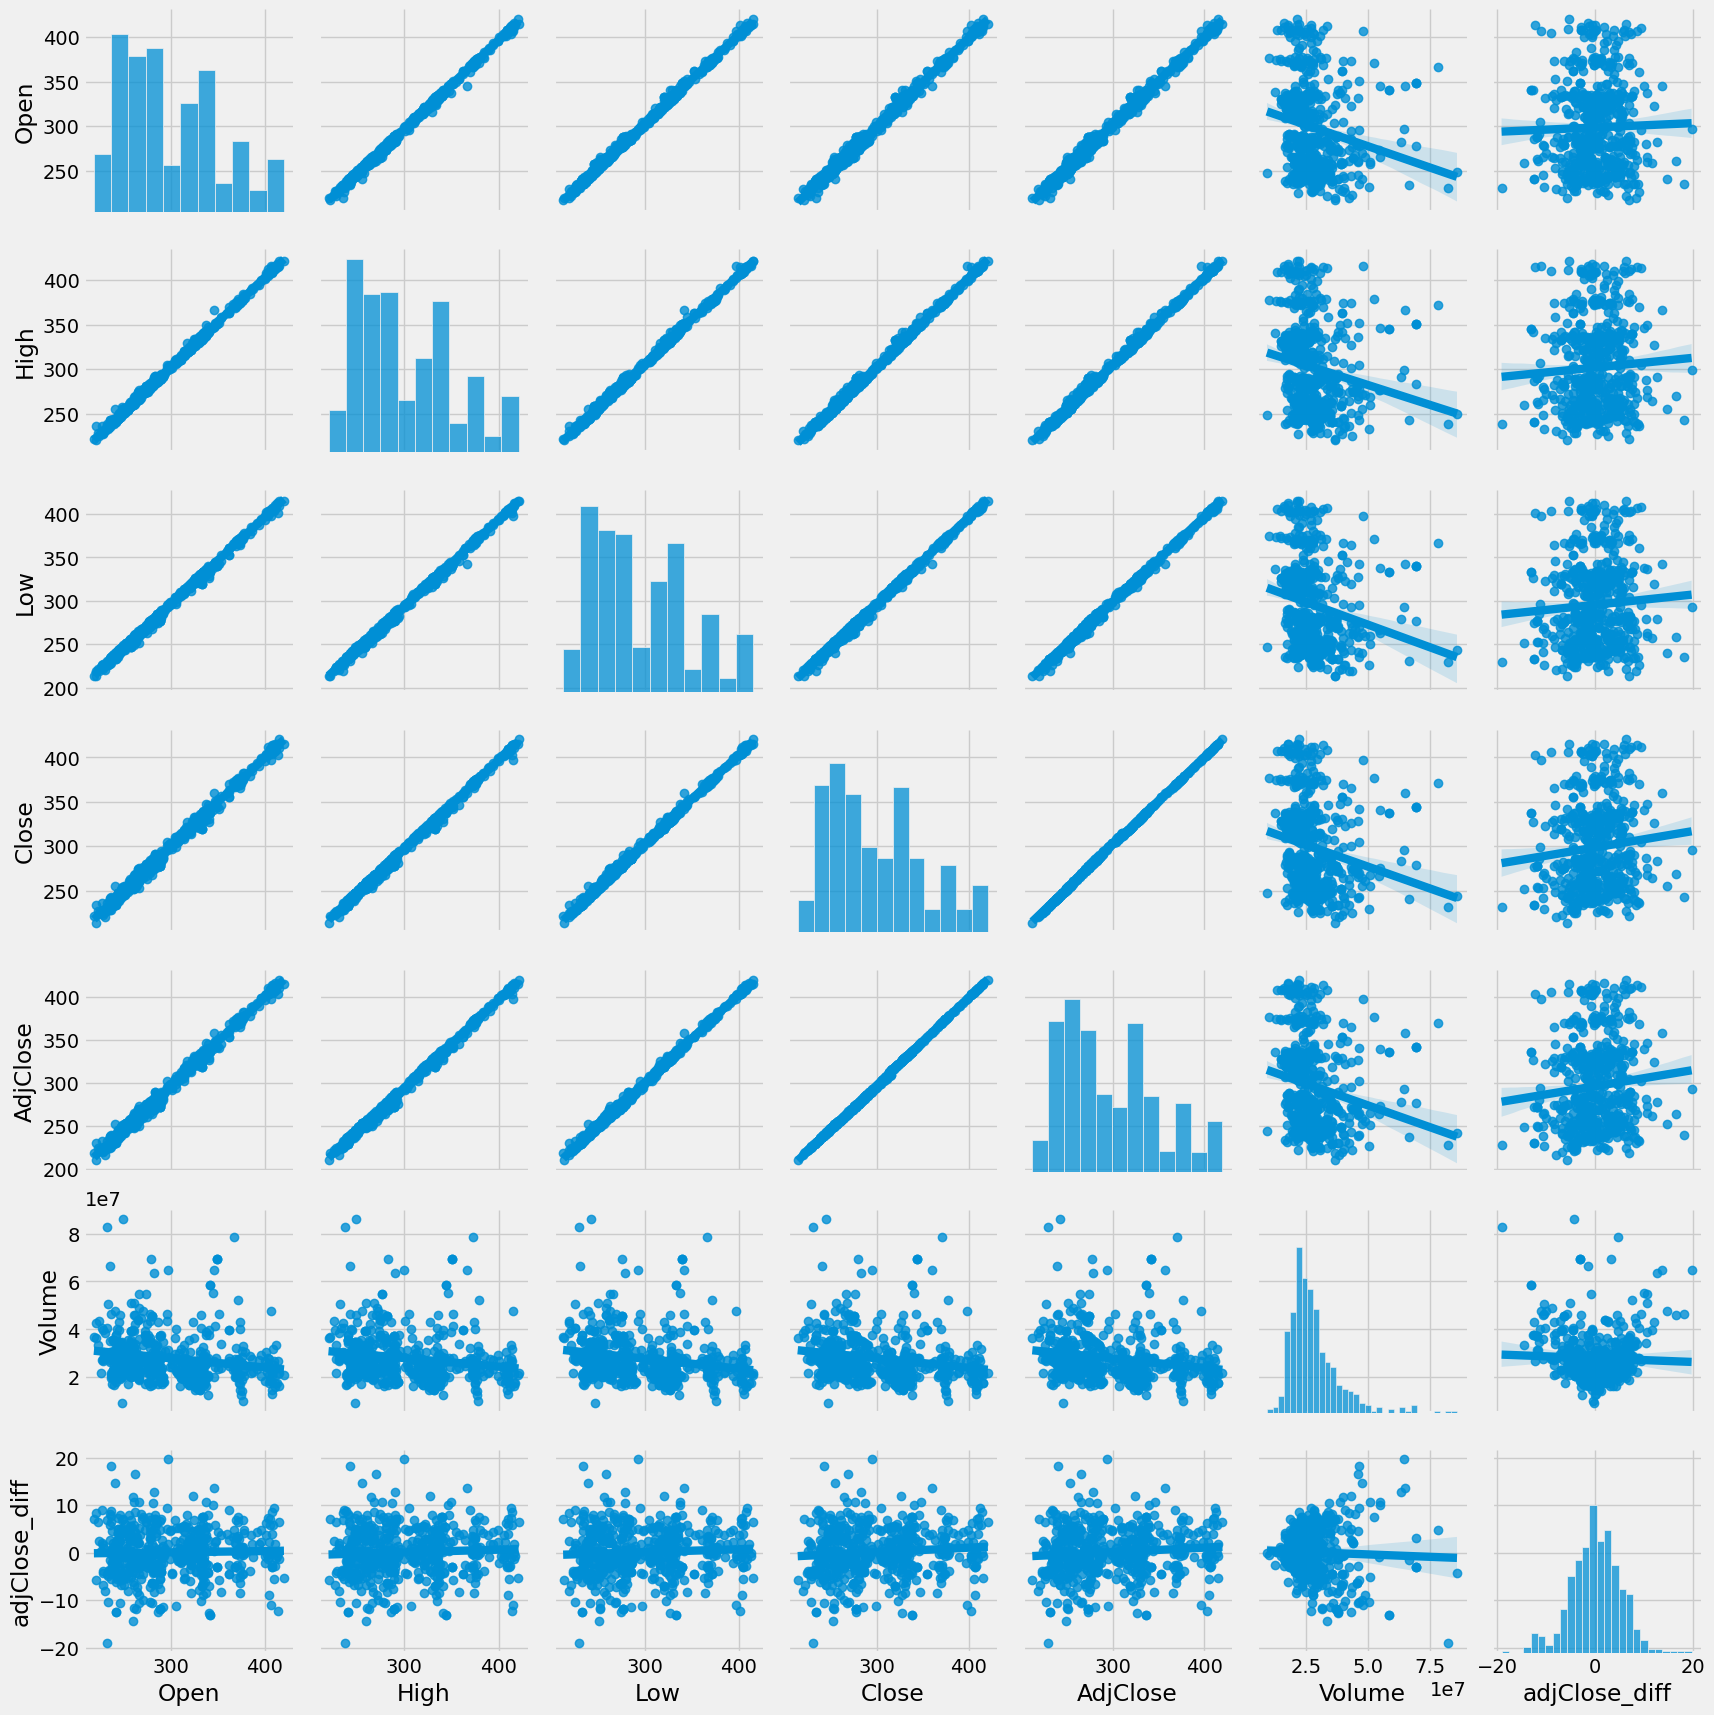

In [240]:
# pairplot

sns.pairplot(bill_df.drop('Date', axis = 1), kind='reg');

In [245]:
# correlation plot
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

fig = px.imshow(bill_df.drop(['Date', 'name', 'content', 'rt', 'like'], axis=1).corr(), template = 'plotly_dark')
fig.show()    # Open ~ AdjClose 까지 모두 서로에게 주는 영향력이 큰 것을 알 수 있음

In [247]:
# box plot 1

fig = px.box(bill_df,x=['Open', 'High', 'Low', 'Close', 'AdjClose'], template = 'plotly_dark', 
             title = 'Outliers')
fig.show()

In [249]:
# box plot 2

fig = px.box(bill_df,x=['Volume'], template = 'plotly_dark', 
             title = 'Outliers')
fig.show()

In [251]:
# 3D scatter plot
fig = px.scatter_3d(bill_df, x='High', y='Low', z='Close',
              color='AdjClose', template = 'plotly_dark', title = 'Distribution of Highs, Lows and Closing Values represented by Adj Close')
fig.show()

<h2>3. Preprocessing

In [252]:
ceo_names = stock_dff['name'].unique().tolist()
ceo_names

['@BillGates',
 '@Carl_C_Icahn',
 '@JohnLegere',
 '@LisaSu',
 '@bchesky',
 '@elonmusk',
 '@levie',
 '@reedhastings',
 '@richardbranson',
 '@tim_cock']

In [256]:
bill = stock_dff[stock_dff['name']=='@BillGates'].copy()
carl = stock_dff[stock_dff['name']=='@Carl_C_Icahn'].copy()
john = stock_dff[stock_dff['name']=='@JohnLegere'].copy()
lisasu = stock_dff[stock_dff['name']=='@LisaSu'].copy()
bche = stock_dff[stock_dff['name']=='@bchesky'].copy()
elon = stock_dff[stock_dff['name']=='@elonmusk'].copy()
levie = stock_dff[stock_dff['name']=='@levie'].copy()
reed = stock_dff[stock_dff['name']=='@reedhastings'].copy()
richard = stock_dff[stock_dff['name']=='@richardbranson'].copy()
tim = stock_dff[stock_dff['name']=='@tim_cock'].copy()

In [260]:
bill.shape, carl.shape, john.shape, lisasu.shape, bche.shape, elon.shape, levie.shape, reed.shape, richard.shape, tim.shape 
# 각각의 데이터가 개수가 다릅니다. 트윗의 개수 차이가 큰 원인 같습니다.

((566, 12),
 (507, 12),
 (1085, 12),
 (509, 12),
 (511, 12),
 (1089, 12),
 (621, 12),
 (505, 12),
 (503, 12),
 (550, 12))

In [ ]:
# 넘파이의 split 함수를 이용하여 데이터셋을 분류해줍니다.
# 트윗이 주가에 주는 영향을 탐구하는 것이기 때문에 label 칼럼은 stock_diff('Open' - 'Close' 의 값에 대한 라벨 부여)칼럼을 만들어서 설정합니다.
# 종가의 차이를 포함한 모든 주식 데이터 값은 달러를 기준으로 하기 때문에
# 값이 
df_lists = [bill, carl, john, lisasu, bche, elon, levie, reed, richard, tim]
for i, df_name in enumerate(df_lists):
    X_train, X_test = np.split()